In [62]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [52]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [53]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [54]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [55]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [56]:
model = tf.keras.Sequential([
 tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(256, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10, activation='softmax')
 ])

C:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
 model.compile(optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
 history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=20,
 validation_split=0.2,
 verbose=1)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8009 - loss: 0.6409 - val_accuracy: 0.9608 - val_loss: 0.1284
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9551 - loss: 0.1462 - val_accuracy: 0.9662 - val_loss: 0.1086
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9710 - loss: 0.0920 - val_accuracy: 0.9756 - val_loss: 0.0804
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9798 - loss: 0.0670 - val_accuracy: 0.9740 - val_loss: 0.0899
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9819 - loss: 0.0597 - val_accuracy: 0.9768 - val_loss: 0.0797
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9838 - loss: 0.0504 - val_accuracy: 0.9758 - val_loss: 0.0921
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9860 - loss: 0.0426 - val_accuracy: 0.9781 - val_loss: 0.0824
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9869 - loss: 0.0399 - val_accu

In [68]:
if len(y_test.shape) > 1:  
    y_test = np.argmax(y_test, axis=1)

y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[ 974    1    0    0    0    0    3    0    1    1]
 [   0 1129    0    0    0    0    2    1    3    0]
 [   1    3 1011    5    1    0    1    6    4    0]
 [   2    0    1  990    0    6    0    4    3    4]
 [   2    2    0    1  962    0    5    3    1    6]
 [   3    0    0    7    1  869    3    1    5    3]
 [   4    2    0    1    2    2  946    0    1    0]
 [   2    1    5    1    0    0    0 1014    5    0]
 [   5    0    2    4    2    1    3    3  954    0]
 [   5    4    0    9   10    3    0    3   11  964]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98  

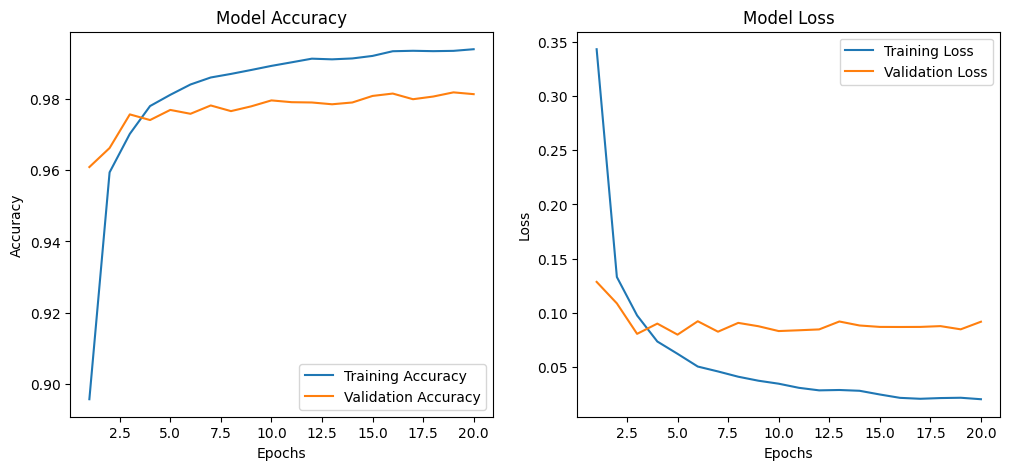

In [63]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()